In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
img1 = cv.imread('DATA/00-puppy.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('DATA/watermark_no_copy.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

<h3> We can blend images using addWeighted method </h3>
But it requires for the images to be of the same resolution

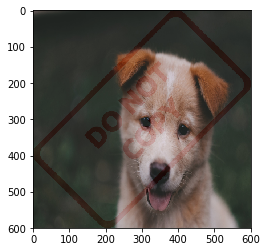

In [14]:
img1 = cv.resize(img1, (600, 600))
img2 = cv.resize(img2, (600, 600))

blended_image = cv.addWeighted(src1 = img1, alpha = 0.9, src2 = img2, beta = 0.1, gamma = 1)
plt.imshow(blended_image)

<h3> Changing ratios is not convenient </h3>

In [15]:
img1 = cv.imread('DATA/00-puppy.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('DATA/watermark_no_copy.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

<h3> Place the smaller image over larger image without blending </h3>

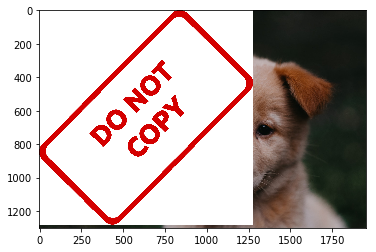

In [18]:
large_img = img1
small_img = img2

y_end = small_img.shape[0]
x_end = small_img.shape[1]

large_img[0:y_end, 0:x_end] = small_img
plt.imshow(large_img)

<h2> Blending </h2>

<h4>Steps</h4>
1. Take the images <br>
2. Reduce the size of the smaller image if necessary <br>
3. Take the larger image and calculate out the region of interest (ROI) <br>
4. Take the smaller image and convert to grayscale, it becomes single channel <br>
5. Invert the smaller grayscale image <br>
6. Now pass the smaller image through the inverted mask <br>
7. At last place the masked image over the ROI <br>

In [16]:
# Take the images
img1 = cv.imread('DATA/00-puppy.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('DATA/watermark_no_copy.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [17]:
# Reduce size of image to be masked
img2 = cv.resize(img2, (600, 600))

In [18]:
# Calculate ROI
large_img = img1
small_img = img2

y_end, x_end, channels = large_img.shape

roi  = large_img[y_end - 600:y_end, x_end - 600:x_end]

In [19]:
# Convert smaller image to grayscale
small_img_gray = cv.cvtColor(small_img, cv.COLOR_BGR2GRAY)

In [20]:
# Invert the smaller gray image
mask_inv = cv.bitwise_not(small_img_gray)

In [21]:
# Blend the small_img and the background image
foreground = cv.bitwise_or(small_img,small_img, mask = mask_inv)

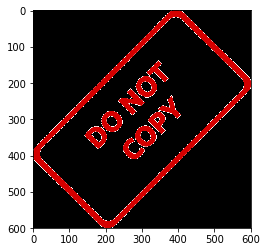

In [22]:
plt.imshow(foreground)

In [23]:
# place the foreground over the ROI
final_ROI = cv.bitwise_or(foreground, roi)

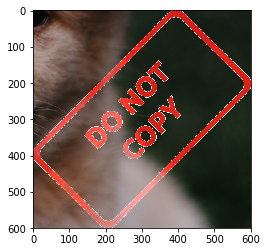

In [24]:
plt.imshow(final_ROI)

In [26]:
# Place the final ROI over the image
large_img[y_end - 600:y_end, x_end - 600:x_end] = final_ROI

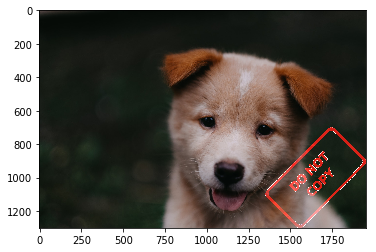

In [27]:
plt.imshow(large_img)

In [30]:
large_img = cv.resize(large_img, (1200, 600))

large_img = cv.cvtColor(large_img, cv.COLOR_RGB2BGR)

while True:
    cv.imshow('image', large_img)
    
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()